<p style='text-align: right; font-size: 15px'> DATA407: Data Science Application I </p> 

<center> <h1> 
    Final Assignment
    </h1> </center>

<center> <h4> Provided on June 9, 2023 <br>
Due on June 23, 2023 </h4> </center>


<h3> <p style='text-align: center;'>  Jong-Hwan Lee (Instructor) and Sangsoo Jin (TA) </p> </h3> 

<p style='text-align: center; font-size: 15px'> Reference: Neuroimaging and Data Science by Ariel Rokem & Tal Yarkoni, 2021 (http://neuroimaging-data-science.org) 
</p>

# Preface

You are required to fill out the codes in this Notebook and submit it (this Notebook file **only**) at the Blackboard.

- Please note that the final assignment is an **individual project**, so no code-sharing is allowed.

Before start, please check the following Python packages are installed in your system:

> `numpy`, `pandas`, `scipy`, `matplotlib` (`seaborn`), `scikit-learn`, `nibabel`, `nipype`, `dipy`, `ndslib`

# Part 1

Through Chapter 12 to Chapter 16, we have learned basic preprocessing steps of neuroimaging data.

Part 1 will review two important preprocessing steps: **image alignment** and **image registration**.

First, let us download a BIDS dataset (ds001233) we have reviewed in Ch. 12. Please run the following codes to download the BIDS dataset in this project directory

In [ ]:
from pathlib import Path
from ndslib.data import download_bids_dataset

if not Path("ds001233/sub-17/ses-pre/").exists():
    download_bids_dataset()

Second, we need a MNI 152 template image which we have use in Ch. 16. 

You can try the `templateflow` package introduced in Ch. 16.1.1. to download the MNI152NLin2009cAsym template. 

However, I found the `templateflow` could fail in some systems. Alternatively, I suggest you to download the template NIFTI file by clicking the link or visiting the website and place the file **in the project directory**.

- [MNI152NLin2009cAsym](https://templateflow.s3.amazonaws.com/tpl-MNI152NLin2009cAsym\tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz)

https://templateflow.s3.amazonaws.com/tpl-MNI152NLin2009cAsym\tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz

Now you can proceed to the questions.

## Q1

First, load two images - T1 (anatomical) image of sub-17 and MNI152NLin2009cAsym (MNI template) image. Then, visualize the **middle silce (z axis)** from the subject's anatomical and template image **side-by-side** using the matplotlib package. [**1 Point**]

FYI, if you successfully downloaded all NIFTI files, we have three types of images in the project directory:

- `ds001233/sub-17/ses-pre/anat/sub-17_ses-pre_T1w.nii.gz`
    - An **anatomical** (T1) image of sub-17
- `ds001233/sub-17/ses-pre/func/sub-17_ses-pre_task-cuedSFM_run-01_bold.nii.gz`
    - A **functional** (BOLD) image of sub-17
- `tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz`
    - A anatomical (T1) image of **MNI 152 Template**

All three images have different resolutions and coordinate systems. Let us visually inspect them. In Q1, you need to (1) load all three NIFTI images, (2) print their **shapes**, and (3) plot the **center slice (in the z axis)** for each image **side-by-side** using matplotlib. [**3 Points**]

- Note that the BOLD image is 4D by nature; please select the **first (t = 0) volume** for the BOLD data and visalize its center slice. 

In [2]:
import templateflow.api as tflow
import nibabel as nib

# 1. load all three NIFTI images
mni_img = nib.load(tflow.get('MNI152NLin2009cAsym', resolution=1, suffix="T1w", desc=None))
mni_data = mni_img.get_fdata()

t1_img_path = 'ds001233/sub-17/ses-pre/anat/sub-17_ses-pre_T1w.nii.gz'
functional_path = 'ds001233/sub-17/ses-pre/func/sub-17_ses-pre_task-cuedSFM_run-01_bold.nii.gz'
t1_img = nib.load(t1_img_path)
functional_img = nib.load(functional_path) # (x, y, z, t)

# 2. print their chapes
print(t1_img.shape)
print(functional_img.shape)
print(mni_img.shape)

(256, 256, 176)
(96, 96, 66, 241)
(193, 229, 193)


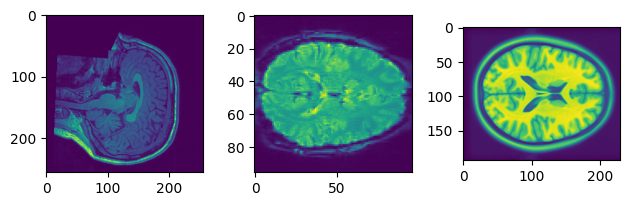

In [3]:
# 3. plot the center slice (in the z axis) for each image side by side
import matplotlib.pyplot as plt

anatomical_center_slice = t1_img.shape[2] // 2
functional_center_slice = functional_img.shape[2] // 2
template_center_slice = mni_img.shape[2] // 2

anatomical_slice = t1_img.dataobj[:, :, anatomical_center_slice]
functional_slice = functional_img.dataobj[:, :, functional_center_slice, 0]
template_slice = mni_img.dataobj[:, :, template_center_slice]

fig, axes = plt.subplots(1,3)
axes[0].imshow(anatomical_slice)
axes[1].imshow(functional_slice)
axes[2].imshow(template_slice)
plt.tight_layout()
plt.show()

## Q2

Since the MNI template is also known as a "standard" template, we want to register/align **both** individual T1 image and BOLD image to the **MNI template space**. 

Let us try to register the **individual T1** image to the **MNI T1** image first. However, Q1 shows two images have **different coordinate systems**, so we need to solve this beforehand. In Q2, you need to (1) align (or, **resample**) the individual T1 image with the MNI T1 space and (2) plot the aligned/resampled individual T1 image and MNI T1 image side by side. [**2 Points**]

- Note that the aligned T1 image must have the same shape as the MNI T1 image. Therefore, let us select the **z = 80 slice** in both images and **plot these slices**. 

In [4]:
# 1. align (or, resample) the individual T1 image with the MNI T1 space
from nibabel.processing import resample_from_to
t1_resampled = resample_from_to(t1_img, (mni_img.shape, mni_img.affine))
t1_resamp_data = t1_resampled.get_fdata()

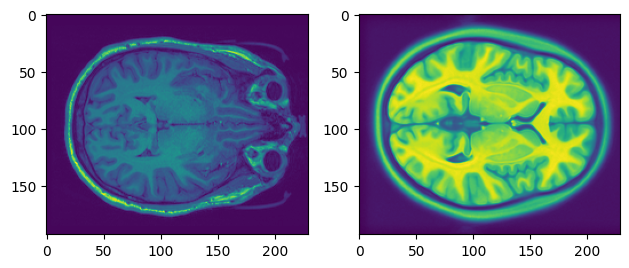

In [5]:
# (2) plot the alinged/resampled individual T1 image and MNI T1 image side by side
fig, axes = plt.subplots(1,2)
axes[0].imshow(t1_resamp_data[:,:,80])
axes[1].imshow(mni_data[:,:,80])
plt.tight_layout()
plt.show()

### Q2-2

[**Bonus**]

Let us compare the **z dimensions** of the original T1 image and MNI T1 image. You will find the **MNI T1** images have **more slices** in the z dimension than the original anatomical image. Now look at the z dimension of the **resampled T1** image. It has the same number of slices to the MNI image. It seems the **z slices have miraculously increased after resampling**! Could you **guess how resampling could increase the number of Z slices** to match with the MNI template? [**0.5 Point**]

Answer: 

Resampling은 이미지의 해상도나, 복셀 크기를 변경하는 과정으로 공간 정보를 보존하면서 이미지를 일치시키기 위해 사용되는 방법이다. 원본 T1 이미지와 MN1 T1 이미지의 z 차원을 비교할 때 후자가 더 많은 슬라이스를 가지고 있는데, 이는 z축을 따라서 더 높은 해상도나 복셀 크기를 갖고 있음을 의미한다.
이렇게 차원을 늘릴 필요가 있을 때는 특정한 알고리즘을 통해 중간의 값을 추정해서, z 차원에 슬라이스를 생성한다.

## Q3

Although shapes of two images are same (i.e., succesfully aligned) after Q2, visual inspection shows large mismatches between two images. Therefore, we need to **register** the resampled T1 image to the MNI space. In Q3, you need to (1) register the resampled individual T1 image to the MNI space using the **affine registration** and (2) plot each **z = 80** slice from the resampled T1, registered T1, and MNI T1 images side-by-side. [**2 Points**]

- You will need to use the `dipy` package to perform the 3D affine registration.

- As you practiced, the affine registration has two steps, optimization and trasformation. Please give a meaningful name (e.g., `affine_t1_to_mni_reg`) to the **optimzed registration object**. We will use the same object again in Q5 without additional optimization.

- Diffeomorphic registration is **not** needed here! (takes too much time)

In [6]:
from dipy.align.transforms import AffineTransform3D
from dipy.align.imaffine import AffineRegistration

affreg = AffineRegistration()
transform = AffineTransform3D()

affine3d = affreg.optimize(mni_data, t1_resamp_data, transform, params0=None)
t1_xform = affine3d.transform(t1_resamp_data)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


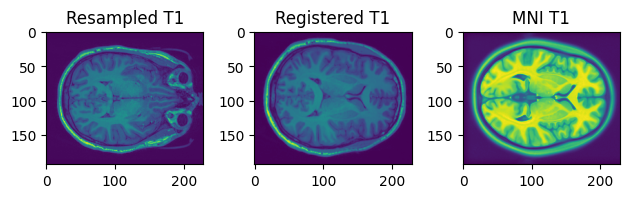

In [7]:
fig, axes = plt.subplots(1,3)
axes[0].imshow(t1_resamp_data[:,:,80])
axes[0].set_title("Resampled T1")

axes[1].imshow(t1_xform[:,:,80])
axes[1].set_title("Registered T1")

axes[2].imshow(mni_data[:,:,80])
axes[2].set_title("MNI T1")

plt.tight_layout()
plt.show()

### Q3-2

[**Bonus**]

Let us compare the registered T1 image and MNI T1 image. It seems the anterior (i.e., front) portion is aligned pretty well, but the posterior (i.e., back) portion look too "short" than the template. I believe **one important factor** might have contributed to this registration problem. In a typical preprocessing pipeline, we handle this factor before alignment and registration. Could you guess what this factor is? [**0.5 Point**]

- Hint: **visually compare** the individual T1 image and MNI T1 image!

Answer:

개별 T1 영상에 목이 존재하는 요인이 문제가 될 수 있다.
두 이미지를 비교할 때 individual T1 image가 neck region을 포함하고 있다면, registraction 과정에서 불일치가 일어날 수 있다. MNI 템플릿에는 없는 해부학적 변이를 추가하기 때문에 등록된 T1 이미지에서 후방부분이 부적절하게 나타날 수 있다.
전처리 파이프라인에서 alignment와 registraction 단계 이전에 수행할 수 있는 방법은 뇌 추출 혹은 두개골 제거이다. 

## Q4

We have done our best to register the individual T1 image to the template space. Now we need to transform the BOLD data into the MNI space. However, the individual BOLD data is a 4D dataset, where we need to apply the transformation to every brain volumes for each timepoint.

Rather, we will compute the **tSNR (temporal signal-to-ratio) map** to reduce the 4D dataset in a **3D dataset**. In Q4, you need to (1) compute the tSNR array from the individual BOLD data and (2) create **a NIFTI1 image object** from the tSNR data array. [**2 Points**]

- tSNR is computed as the **mean signal across all time points** divided by the **standard deviation across the all timpoint** signals, for each voxel.

- If a temporal standard deviation for each voxel is too small, then its tSNR becomes **too high**. Therefore, please **compute tSNR** for voxels whose temporal standard deviation is **larger than 0.001 (10e-3)**, and assign **zero tSNR** for voxels with **too small standard deviations**. 

- Please refer to the [reference document](https://nipy.org/nibabel/reference/nibabel.nifti1.html#nibabel.nifti1.Nifti1Image) of Nibabel's NIFTI1Image class. To create a NIFITI1Image object, you will need a **data array** and an **affine matrix**.

In [8]:
# 1. Compute the tSNR array from the individual BOLD data
import numpy as np

bold_img = functional_img
bold_img_data = bold_img.dataobj

mean_signal = np.mean(bold_img_data, axis=3)
std_signal = np.std(bold_img_data, axis=3)
tSNR_array = np.where(std_signal > 0.001, mean_signal / std_signal, 0)

/var/folders/0y/g4ykw8915zj969f_nldwxbf40000gn/T/ipykernel_73694/2347453999.py:9: RuntimeWarning: invalid value encountered in divide
  tSNR_array = np.where(std_signal > 0.001, mean_signal / std_signal, 0)


In [9]:
# 2. create a NIFTI1 image object from the tSNR data array
tsnr_img = nib.nifti1.Nifti1Image(tSNR_array, bold_img.affine)

## Q5

Now we need to **repeat** the alignment (Q2) and registration (Q3) processes to the BOLD tSNR map data. In Q5, you need to (1) **align (resample)** the BOLD tSNR data to the **resampled** individual T1 image, (2) **register** the resampled BOLD tSNR image to the MNI space using the **optimized affine registration** object, (3) plot each **z = 80 slice** for the registered BOLD tSNR image, registered individual T1 image, and MNI template image, side-by-side. [**3 Points**]

In [10]:
resampled_tsnr_img = resample_from_to(tsnr_img, (mni_img.shape, mni_img.affine))
resampled_tsnr_data = resampled_tsnr_img.get_fdata()

affine3d = affreg.optimize(mni_data, resampled_tsnr_data, transform, params0=None)
bold_xform = affine3d.transform(t1_resamp_data)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


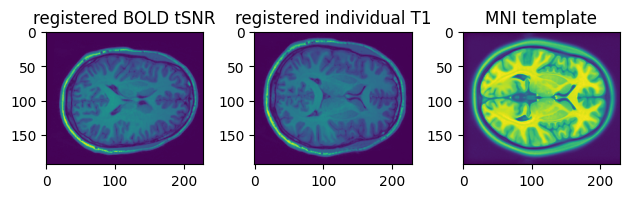

In [11]:
fig, axes = plt.subplots(1,3)
axes[0].imshow(bold_xform[:,:,80])
axes[0].set_title("registered BOLD tSNR")

axes[1].imshow(t1_xform[:,:,80])
axes[1].set_title("registered individual T1")

axes[2].imshow(mni_data[:,:,80])
axes[2].set_title("MNI template")

plt.tight_layout()
plt.show()

# Part 2

Through Chapter 17 to Chapter 22, we have learned basic concepts of machine learning in neuroimaging data.

Part 2 will review concepts like **regression**, **validation**, and **model selection** in a brain age prediction task.

Before we start, please load the ABIDE II dataset by running the following codes:

In [12]:
from ndslib.data import load_data
abide_data = load_data("abide2")

The ABIDE II dataset provided here contains many structural brain features (computed using FreeSurfer) from autism spectrum disorder (ASD) and control participants. Let us assume we want to **verify a hypothesis** that the ASD group shows **younger brain age** than the **actual age** since ASD is a neurodevelopment disorder.

Therefore, we will (1) build a regression model to **predict brain ages of the control group** and (2) predict brain ages of the ASD group **using the trained regression model**, and (3) compare the actual age and **predicted age of the ASD group**.

## Q1

To build a brain age prediction model for the control group, we should filter the necessary data from the ABIDE II dataset. In Q1, we need to (1) filter only the control group data (i.e., `group` == 2.0), (2) extract `Feature` data that includes **all `fsVol` (Brain region volume data) columns** from the control group data, and (3) extract `Label` data that is the **`age` column**. [**3 Points**]

- For (2), you may need to "filter" all columns that contains a string `fsVol`.

In [13]:
# 1. filter only the control group data
control_group_data = abide_data[abide_data['group'] == 2.0]

# 2. extract Feature data that includes all fsVol
feature_data = control_group_data.filter(like='fsVol')

#3. extract Label data that is the age column.
label_data = control_group_data['age']

## Q2

A simple **linear regression** model is an easy and straightforward prediction model. However, we have a **relatively large number of features** (360), so a linear regression model is **prone to overfitting**. Q2 would test this; you need to (1) fit a linear regresison model **using all control group data** and compute an **R2 score** of this model and (2) compute a **cross-validated R2 score** using the **5-fold** cross-validation scheme. [**2 Points**]

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
X = feature_data
y = label_data
model.fit(X, y)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mean_r2_score = cv_scores.mean()

print(mean_r2_score) # negative score -> implies overfitting

-1.2490969021584948


## Q3

Q2 demonstrate overfitting in the linear regression model. Therefore, we need more sophisticated regression model that can **penalize uninformative features**. Let us use a **LASSO regression model** here. Note that a lasso model requires an **hyperparameter** called alpha, so we need to find an **optimal alpha parameter** using **cross validation**.

In Q3, we will try the **similar approach as Ch. 21.2.1.4**. So, (1) we need to set the possible alpha candidates: `[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]`, (2) we will fit a **lasso regression** model and compute R2 scores for all alpha candidates using `sklearn.model_selection.validation_curve`, (3) draw the validation curve, and (4) find the optimal alpha value. [**4 Points**]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+03, tolerance: 4.078e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+03, tolerance: 4.078e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

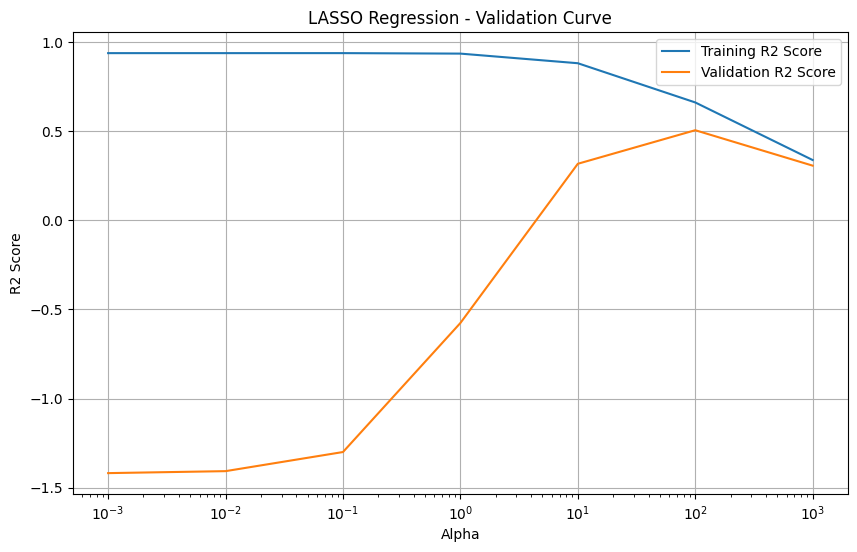

Optimal Alpha: 100.0


In [15]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

# Define the alpha values to try
alphas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

# Create a Lasso regression model
lasso_model = Lasso()

# Compute the validation curve
train_scores, valid_scores = validation_curve(
    lasso_model, X, y, param_name='alpha',
    param_range=alphas, cv=5, scoring='r2')

mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_train_scores, label='Training R2 Score')
plt.plot(alphas, mean_valid_scores, label='Validation R2 Score')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.title('LASSO Regression - Validation Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal alpha value
optimal_alpha = alphas[np.argmax(mean_valid_scores)]
print("Optimal Alpha:", optimal_alpha)

## Q4

Now we can train a Lasso regression model with the optimal hyperparameter found in Q3. After that, we can **apply the trained model to the ASD group** and check whether our model is generalizable or not. In Q4, you will (1) train a Lasso regression model using all control group data, (2) prepare the `Feature` and `Label` data from ABIDE ASD group, and (3) compute the R2 score of the Lasso model on the ASD group. [**3 Points**] 

- For (2), the ASD `Feature` data should contain the **same columns** of the control `Feature` data.
- For (3), the cross-validated R2 score is **not** necessary (already out-of-sample estimate).  

In [16]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# 1. Train Lasso regression model on control group data
lasso_model = Lasso(alpha=optimal_alpha)
lasso_model.fit(X, y)

# 2. prepare the frature and label data from ABIDE ASD group
asd_group_data = abide_data[abide_data['group'] == 1.0]
asd_features = asd_group_data.filter(like='fsVol')
asd_label_data = asd_group_data['age']

# 3. compute the R2 score of the Lasso model on the ASD group
r2_score_asd = lasso_model.score(asd_features, asd_label_data)
print(r2_score_asd)


0.5316598436603125


## Q5

Now, let's answer the original hypothesis! You need to (1) predict brain ages of the ASD group and (2) visualize the relationship between the **actual age** and the **predicted brain age**. Then, (3) **evaluate** whether our findings **support** the hypothesis. [**3 Points**]

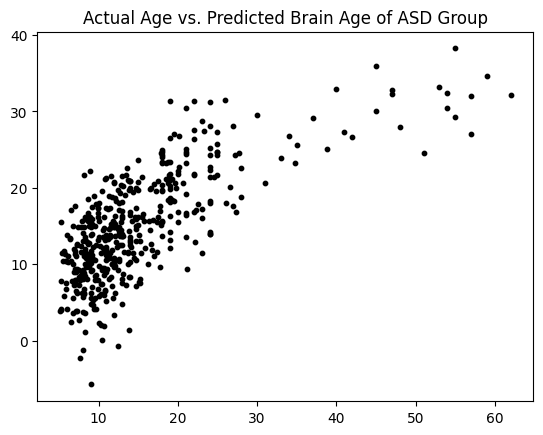

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. predict brain ages of the ASD group
predicted_age_asd = lasso_model.predict(asd_features)

# 2. visualize the relationship between the actual age and the predicted brain age
plt.scatter(asd_label_data, predicted_age_asd, s=10, c='black')
plt.title("Actual Age vs. Predicted Brain Age of ASD Group")
plt.show()

In [18]:
# 3. evaluate whether out findings support the hypothesis

# Calculate correlation coefficient
correlation = np.corrcoef(predicted_age_asd, asd_label_data)[0, 1]
print("Correlation coefficient:", correlation)

# Calculate mean predicted brain age and mean actual age
mean_predicted_age = np.mean(predicted_age_asd)
mean_actual_age = np.mean(asd_label_data)
print("Mean predicted brain age:", mean_predicted_age)
print("Mean actual age:", mean_actual_age)

Correlation coefficient: 0.7297713597713203
Mean predicted brain age: 14.924909568597808
Mean actual age: 15.037285874967601


Answer:

average predicted brain age 14.92는 actual brain age인 15.04보다 약간 낮다. 이는 평균적으로 예측된 뇌 연령이 ASD 그룹에서 실제 연령보다 약간 어린 경향을 보인다는 것을 의미할 수 있다. 이는 ASD가 신경 발달적 차이로 인해 실제 연령보다 뇌 연령이 어릴 수 있다는 가설에 부합한다.

### Q5-2

[**Bonus**]

Our analysis steps have some (or many?) weaknesses. 

Could you summarize **two weaknesses**? 

Also, can you express your opinion on **how to improve them**? [**0.5 points for each answer; maximum 1 point**]

Answer:

예측 모델을 사용하여 ASD 그룹의 뇌 연령을 예측하고, 이를 실제 연령과 비교함으로써 가설을 지지하는 결과를 냈다. 하지만 이것은 단순히 관련성을 나타낼 뿐 실제로 인과관계가 있는지는 추가적인 연구를 해 봐야 한다.

또 모델의 성능 평가 지표로서 R2 를 사용했는데, 이는 설명력을 나타내는 정보지만 이 외에 추가적인 정보를 제공하지는 않는다. 다각도로 모델의 성능을 평가하기에는 R2지표만으로는 무리가 있다.

또한 우리가 사용한 데이터가 모든 개인을 나타내지는 못할 수 있으며 일반화의 오류가 발생할 수 있다.



<p style='text-align: right; font-size: 10px'> DATA407 </p>

<center> <h1> Thank you for your participation in this course! </h1> </center>

<p style='text-align: right; font-size: 10px'> Final assignment </p>